In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

## Об используемом датасете
Датасет представляют собой информацию о жилой недвижимости взависимости от района в Калифорнии по переписи 1990-ого года. Зависимая переменная - средняя цена на жилье в районе, предикторы - все остальное. </br>
Источник: https://www.kaggle.com/camnugent/california-housing-prices

In [9]:
data = pd.read_csv("housing.csv")
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [10]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
data.shape

(20640, 10)

In [11]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [12]:
replace_dict = {"ocean_proximity":{"<1H OCEAN":0, "INLAND": 1, "NEAR OCEAN":2, "NEAR BAY":3,"ISLAND":4 }}

data.replace(replace_dict, inplace=True)
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,3


### Заполнение пропущенных значений

In [13]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [14]:
totbedrooms_mean = data["total_bedrooms"].mean()
data = data.fillna(totbedrooms_mean)

In [20]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

### Небольшой EDA

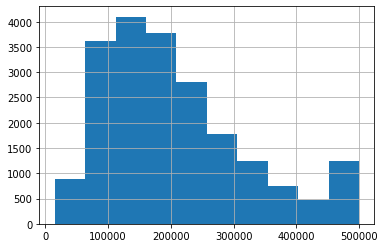

In [16]:
# не похоже на нормальное распределние 
data["median_house_value"].hist()

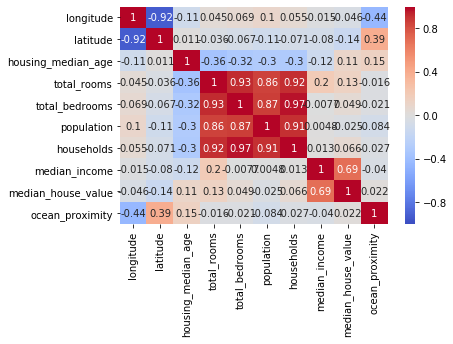

In [19]:
#корреляционная матрица
cov_mat = data.corr()
sns.heatmap(cov_mat, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Некоторые признаки коррелируют между собой. Может возникнуть проблема мультиколлинеарности. 

### Подготовка данных

In [21]:
y_colname = "median_house_value"
X = data.loc[:, data.columns != y_colname]
y = data[y_colname]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, shuffle = True, test_size = 0.25)

### Построение модели

In [24]:
model = LinearRegression(normalize = True)

In [26]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [27]:
model.coef_

array([-4.33486066e+04, -4.26355943e+04,  1.19042455e+03, -7.92775980e+00,
        1.20691260e+02, -3.86810257e+01,  4.09225440e+01,  4.02706973e+04,
       -2.12080179e+03])

In [29]:
preds = model.predict(X_test)

In [ ]:
print("MAE:", metrics.mean_absolute_error(y_test, preds))
print("MSE:", metrics.mean_squared_error(y_test, preds))
print("R2 score:", metrics.r2_score(y_test, preds))
print("Relative MAE:",metrics.mean_absolute_error(y_test, preds)/prices_mean)

In [53]:
import sklearn.metrics as metrics

prices_mean = data[y_colname].mean()

def print_metrics(y_test, preds):
    print("MAE:", metrics.mean_absolute_error(y_test, preds))
    print("MSE:", metrics.mean_squared_error(y_test, preds))
    print("R2 score:", metrics.r2_score(y_test, preds))
    print("Relative MAE:",metrics.mean_absolute_error(y_test, preds)/prices_mean)

## Одномерные варианты

----- longitude -----
MAE: 90641.81892949226
MSE: 13209653956.387121
R2 score: 0.0017024474393453337
Relative MAE: 0.4381883975223417
----- latitude -----
MAE: 90068.94877960274
MSE: 12937288274.0091
R2 score: 0.02228602934218704
Relative MAE: 0.4354189798745809
----- housing_median_age -----
MAE: 90406.29215766411
MSE: 13065943898.87335
R2 score: 0.0125630952025656
Relative MAE: 0.43704979395127624
----- total_rooms -----
MAE: 89728.74553623669
MSE: 12987223101.780167
R2 score: 0.018512288068117444
Relative MAE: 0.4337743403935657
----- total_bedrooms -----
MAE: 90769.39182757156
MSE: 13197054634.775137
R2 score: 0.0026546201435430072
Relative MAE: 0.43880512128667976
----- population -----
MAE: 90988.90814246598
MSE: 13227381191.766306
R2 score: 0.00036274121001211856
Relative MAE: 0.4398663257438456
----- households -----
MAE: 90594.13533003093
MSE: 13163294445.89375
R2 score: 0.005205990076892264
Relative MAE: 0.4379578814064602
----- median_income -----
MAE: 62689.704626466264
MSE

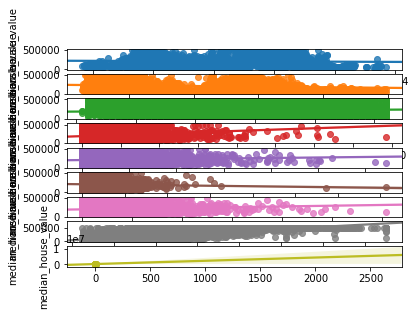

In [67]:
y_colname = "median_house_value"

X_cols = data.loc[:, data.columns != y_colname].columns

fig, axs = plt.subplots(len(X_cols))

for i, x_colname in enumerate(X_cols):
    X = data.loc[:, x_colname].values.reshape(-1, 1)
    y = data[y_colname]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, shuffle = True, test_size = 0.25)

    model = LinearRegression(normalize = True)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("-----", x_colname, "-----")
    print_metrics(y_test, preds)
    sns.regplot(X_train.flatten(), y_train, fit_reg = True, ax=axs[i])